In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [3]:
# 0. Cargar los datos de estatura y peso
url = 'http://wiki.stat.ucla.edu/socr/index.php?title=SOCR_Data_Dinov_020108_HeightsWeights&oldid=12529'

height_weight_df = pd.read_html(url)[1][['Height(Inches)','Weight(Pounds)']]

In [ ]:
# 1. Count records in the dataframe
# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada
# 3. Hallar el intercepto
# 4. Hacer la grafica
# 5. Hallar correlacion y valor p
# 6. Interpretar el valor p

# 1. Count records in the dataframe


In [4]:
height_weight_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [6]:
print(f"Records in df: {len(height_weight_df)}")

Records in df: 200


# 2. Crear una regresion lineal con estatura como variable explicatoria y peso como variable explicada


In [7]:
model = linear_model.LinearRegression()

In [55]:
x = height_weight_df[['Height(Inches)']]
y = height_weight_df[['Weight(Pounds)']]

In [56]:
model.fit(x,y)

LinearRegression()

# 3. Hallar el intercepto

In [57]:
slope = model.coef_[0]
intercept = model.intercept_

In [58]:
print(f'La pendiente de la recta es: {slope[0]:.2f}. El intercepto es: {intercept[0]:.2f}')

La pendiente de la recta es: 3.43. El intercepto es: -106.03


# 4. Hacer la grafica

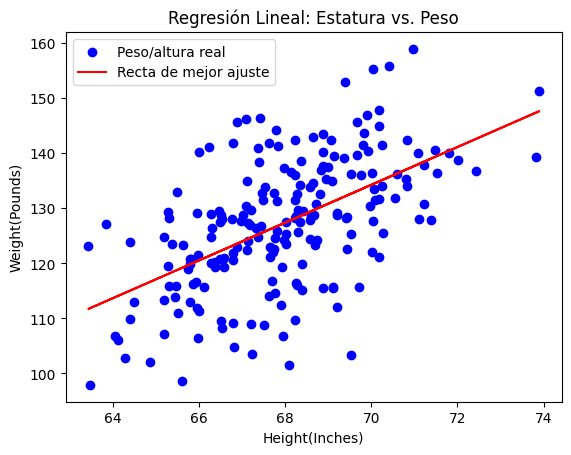

In [67]:
height_weight_df['PesoPredecido'] = model.predict(x)
plt.scatter(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'], color='blue', label='Peso/altura real')
plt.plot(height_weight_df['Height(Inches)'], height_weight_df['PesoPredecido'], color='red', label='Recta de mejor ajuste')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.title('Regresión Lineal: Estatura vs. Peso')
plt.legend()
plt.show()

# 5. Hallar correlacion y valor p

In [61]:
correlation, p_value = pearsonr(height_weight_df['Height(Inches)'], height_weight_df['Weight(Pounds)'])

In [62]:
print(f"El valor de correlacion es: {correlation:.2f}, El valor P es: {p_value}")

El valor de correlacion es: 0.56, El valor P es: 1.102901515126636e-17


# 6. Interpretar el valor p

Como se plantea en la documentación de scipy stats, al utilizar la función para calcular el valor de correlación pearson se obtienen 2 resultados. El primero de los dos resultados establece un valor de correlacion entre -1 y 1. El -1 establece que hay una correlación negativa es decir que a medida que la variable explicatoria decrece la variable explicada tambien. Asimismo, el 1 establece que hay una correlación positiva, a medida que la variable explicatoria crece la explicada también crece. Por esto mismo, si llegamos al punto medio entre los 2, es decir el valor 0, se puede determinar que no existe ningun tipo de correlación entre las 2 variables. 

Por otro lado, el segundo valor de la función nos da el valor-p de lo que se estuvo comparando. Utilizando la documentaicón como referencia, se pueden establecer 3 tipos de hipotesis alternativas, de 2 colas, cola derecha, cola izquierda. Por default, la función utiliza las 2 colas para establecer este valor-p. Al tener un valor de p menor que el nivel de confiabilidad, se establece que se puede rechazar la hipotesis nula. En este caso nuestra hipotesis nula, por ser de 2 colas, establece que no existe ningun tipo de correlación entre las 2 variables, es decir que el valor de correlación sería igual a 0. En este caso se obtuvo un valor-p sumamente pequeño, lo cual indica que sería muy poco probable que la correlación que se observa a través de los datos analizados paso solamente por azar. 

Por lo tanto al interpretar el valor-p se puede establecer que efectivamente si existe una correlación entre las 2 variables de altura y peso.